# Deliverable 1

## Code by Navya Jain

In this file, I work with the 6-month data to answer a key question.

## Step 1 - Loading the files into a pandas dataframe

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 6_friday_am.xlsx to 6_friday_am.xlsx
Saving 6_daily_end.xlsx to 6_daily_end.xlsx


In [3]:
import io

In [4]:
#loading into pandas dataframe
daily_end = pd.read_excel(io.BytesIO(uploaded['6_daily_end.xlsx']))
friday_am = pd.read_excel(io.BytesIO(uploaded['6_friday_am.xlsx']))

In [5]:
#checking whether the data is loaded clearly or not
daily_end.head(2)

,mbl_cod,rsp_id,ts,local_time,DAILY_BREAKS,LOCATION_END,STRESS,PULSE_OX,HEART_RATE,RESPIRATION,BODY_BATTERY,STEPS,CALORIES,FLOORS,INTENSITY_MINUTES,AVG_AMP,VOX_ACTV
0,11822993.0,32680.0,1.652130e+09,2022-05-09 16:07:27,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11822993.0,32680.0,1.652223e+09,2022-05-10 17:52:17,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
friday_am.head(2)

,mbl_cod,rsp_id,ts,local_time,LOCATION_AM,DISCOMFORT_SLIDER,LIFE_SATISFACTION,HAPPINESS,PHYSICAL_HEALTH,MENTAL_HEALTH,...,PULSE_OX,HEART_RATE,RESPIRATION,BODY_BATTERY,STEPS,CALORIES,FLOORS,INTENSITY_MINUTES,AVG_AMP,VOX_ACTV
0,11822993.0,32680.0,1.652456e+09,2022-05-13 10:27:04,2.0,1.0,5.0,6.0,7.0,7.0,...,0.0,88.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11822993.0,32680.0,1.653060e+09,2022-05-20 10:12:14,7.0,1.0,6.0,5.0,5.0,5.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since all the data files are loaded into pandas dataframe, we can begin our analysis.

We have to answer 2 key questions for deliverable 1. This notebook has the code contributing to answering one of those questions.

In [8]:
#average number of breaks taken by each person
avg_breaks = daily_end.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()

In [9]:
#checking the dataframe
avg_breaks.head()

,rsp_id,DAILY_BREAKS
0,32676.0,5.333333
1,32678.0,3.444444
2,32679.0,3.265625
3,32680.0,4.323529
4,32681.0,2.951220


In [10]:
import matplotlib.pyplot as plt

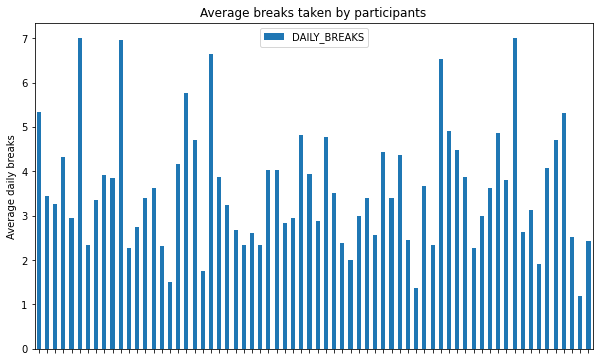

In [16]:
#plotting the number of average breaks taken by a person
fig, ax = plt.subplots(figsize=(10, 6))
avg_breaks.plot(x='rsp_id', y='DAILY_BREAKS', kind='bar', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Average daily breaks')
ax.set_title('Average breaks taken by participants')
ax.set_xticklabels([])
plt.show()

In [19]:
#merging the friday_am dataframe
merged_df = pd.merge(friday_am, avg_breaks, on = 'rsp_id', how = 'right')

In [20]:
#calculating the florence scores
merged_df["florence_score"]=merged_df["LIFE_SATISFACTION"]+merged_df["HAPPINESS"]+merged_df["PHYSICAL_HEALTH"]+merged_df["MENTAL_HEALTH"]+merged_df["WORTHWHILE"]+merged_df["PURPOSE"]+merged_df["PROMOTE_GOOD"]+merged_df["DELAYED_HAPPINESS"]+merged_df["CONTENT_RELATIONSHIPS"]+merged_df["SATISFYING_RELATIONSHIPS"]+merged_df["LIVING_EXPENSES"]+merged_df["FOOD_HOUSING"]

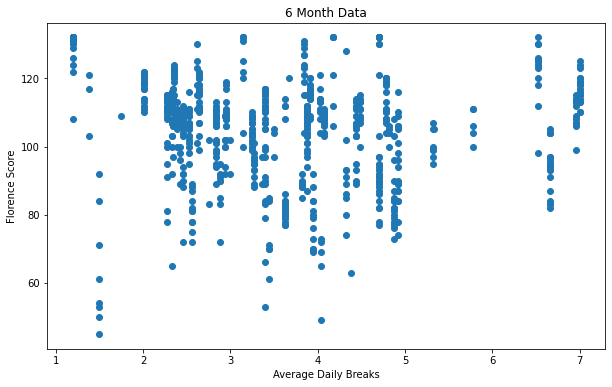

In [26]:
#plotting
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(merged_df['DAILY_BREAKS'], merged_df['florence_score'])
plt.xlabel("Average Daily Breaks")
plt.ylabel("Florence Score")
plt.title("6 Month Data")
plt.show()